## 予測モデルを構築する

### データの準備

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [2]:
XY = pd.read_csv('../data/XY.csv')
XY.base_date = pd.to_datetime(XY.base_date)
XY.head()

,base_date,Local Code,log_R,return_5,return_25,return_75,HV_5,HV_25,HV_75,MADR5,MADR25,MADR75,MXDR5,MXDR10,MXDR20,MNDR5,MNDR10,MNDR20,RNDR,RSI,OperatingIncome_NetSales,OrdinaryIncome_NetSales,NetIncome_NetSales,NetSales_Growth,OperatingIncome_Growth,OrdinaryIncome_Growth,NetIncome_Growth,Forecast_NetSales_Growth,Forecast_OperatingIncome_Growth,Forecast_OrdinaryIncome_Growth,Forecast_NetIncome_Growth,Capital_Ratio,ROE,ROA,CF_Operating_pn,CF_Financing_pn,CF_Investing_pn,Dividend_Yeild,label_date_5,label_high_5,label_low_5,label_date_10,label_high_10,label_low_10,label_date_20,label_high_20,label_low_20,high_low_5,high_low_10,high_low_20,center_5,center_10,center_20
0,2016-05-09,1301,0.011556,-0.003817,-0.003817,-0.015094,0.014385,0.020458,0.019105,0.006168,0.004155,-0.009914,-0.003759,-0.014870,-0.014870,0.015686,0.015686,0.023715,0.003846,0.526316,0.010736,0.012417,0.007938,0.000000,0.000000,0.000000,0.000000,-0.483731,-0.424579,-0.538024,-0.555309,0.243795,0.077997,0.019015,1.0,1.0,-1.0,0.001916,2016-05-16,0.01533,-0.01149,2016-05-23,0.02299,-0.01149,2016-06-06,0.03448,-0.01149,0.02682,0.03448,0.04597,0.001920,0.005750,0.011495
1,2016-08-05,1301,-0.003837,-0.018868,0.000000,-0.007634,0.010664,0.015279,0.015602,-0.006116,-0.010956,-0.012408,-0.011321,-0.015038,-0.015038,0.000000,0.000000,0.007782,0.000000,0.411765,0.008945,0.007279,0.010554,0.000000,0.000000,0.000000,0.000000,1.241122,1.997859,2.421053,0.451906,0.226257,0.023962,0.005422,0.0,0.0,0.0,0.001923,2016-08-15,0.02692,0.00385,2016-08-22,0.02692,0.00000,2016-09-05,0.02692,0.00000,0.02307,0.02692,0.02692,0.015385,0.013460,0.013460
2,2016-11-04,1301,-0.023082,-0.025298,-0.013533,0.033333,0.009818,0.009007,0.010838,-0.019130,-0.019815,0.004634,-0.003242,-0.004676,-0.006463,0.000000,0.000000,0.000000,-0.001111,0.354430,0.010687,0.009163,0.010824,0.000000,0.000000,0.000000,0.000000,1.226887,1.988898,2.286853,0.770658,0.221484,0.050254,0.011131,0.0,0.0,0.0,0.001854,2016-11-11,0.00000,-0.03967,2016-11-18,0.00000,-0.03967,2016-12-05,0.00779,-0.03967,0.03967,0.03967,0.04746,-0.019835,-0.019835,-0.015940
3,2017-02-17,1301,0.000354,0.029508,0.038207,0.021323,0.007324,0.007095,0.008334,0.005122,0.030920,0.041907,-0.002816,-0.002816,-0.002816,0.019956,0.034216,0.036504,0.009286,0.815068,0.015958,0.015708,0.013607,0.006065,0.164167,0.051711,1.161518,0.355744,0.218663,0.167315,-0.142507,0.220017,0.095000,0.020902,0.0,0.0,0.0,0.001769,2017-02-24,0.04246,0.00177,2017-03-03,0.07749,0.00177,2017-03-17,0.13588,0.00177,0.04069,0.07572,0.13411,0.022115,0.039630,0.068825
4,2017-05-11,1301,0.016579,0.035775,0.009967,0.110705,0.012836,0.012920,0.012303,0.018153,0.036481,0.035992,0.000000,0.000000,0.000000,0.013988,0.022008,0.041710,0.013333,0.777778,0.015738,0.015679,0.010238,0.043839,0.530210,0.318053,0.346304,0.056810,0.074402,0.078458,0.114781,0.260712,0.095388,0.024869,1.0,1.0,-1.0,0.019737,2017-05-18,0.01480,-0.02632,2017-05-25,0.04441,-0.02632,2017-06-08,0.04441,-0.02632,0.04112,0.07073,0.07073,-0.005760,0.009045,0.009045


In [3]:
XY.isnull().sum()

base_date                             0
Local Code                            0
log_R                                 0
return_5                              0
return_25                             0
return_75                             0
HV_5                                  0
HV_25                                 0
HV_75                                 0
MADR5                                 0
MADR25                                0
MADR75                                0
MXDR5                                 0
MXDR10                                0
MXDR20                                0
MNDR5                                 0
MNDR10                                0
MNDR20                                0
RNDR                                  0
RSI                                   0
OperatingIncome_NetSales           1992
OrdinaryIncome_NetSales             126
NetIncome_NetSales                   27
NetSales_Growth                       0
OperatingIncome_Growth                0


In [4]:
# 欠損値はゼロ埋め
XY.fillna(0, inplace=True)
print('null num;', XY.isnull().sum().sum())

# 開始時点と終了時点
print('start:', XY.base_date.min(), ' end:', XY.base_date.max())

XY.describe()

null num; 0
start: 2016-04-22 00:00:00  end: 2020-12-29 00:00:00


,Local Code,log_R,return_5,return_25,return_75,HV_5,HV_25,HV_75,MADR5,MADR25,MADR75,MXDR5,MXDR10,MXDR20,MNDR5,MNDR10,MNDR20,RNDR,RSI,OperatingIncome_NetSales,OrdinaryIncome_NetSales,NetIncome_NetSales,NetSales_Growth,OperatingIncome_Growth,OrdinaryIncome_Growth,NetIncome_Growth,Forecast_NetSales_Growth,Forecast_OperatingIncome_Growth,Forecast_OrdinaryIncome_Growth,Forecast_NetIncome_Growth,Capital_Ratio,ROE,ROA,CF_Operating_pn,CF_Financing_pn,CF_Investing_pn,Dividend_Yeild,label_high_5,label_low_5,label_high_10,label_low_10,label_high_20,label_low_20,high_low_5,high_low_10,high_low_20,center_5,center_10,center_20
count,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.000000,64679.00000,64679.000000,64679.000000,64679.000000
mean,5776.770822,0.001912,0.005493,0.020698,0.041783,0.030583,0.029787,0.032601,0.002433,0.009483,0.013748,-0.017189,-0.029857,-0.045817,0.020929,0.036353,0.059796,0.002236,0.526674,-0.072047,-0.068704,-0.093042,0.042501,0.012128,-0.025987,-0.007796,0.775380,0.527790,0.609016,0.730927,0.527564,0.017978,0.016644,0.186614,-0.110855,-0.191561,0.010241,0.043496,-0.044861,0.060426,-0.055757,0.087227,-0.072753,0.088357,0.116183,0.15998,-0.000683,0.002334,0.007237
std,2388.143657,0.031940,0.058558,0.125821,0.250804,0.024327,0.018204,0.016936,0.030827,0.066215,0.109550,0.028321,0.042007,0.057527,0.033661,0.054543,0.085574,0.052172,0.168660,5.812668,5.889131,5.872480,0.476915,9.880387,8.633348,19.164059,2.197658,21.165324,16.083789,20.449841,0.216126,2.232606,0.066707,0.473445,0.495116,0.470743,0.013405,0.092342,0.065769,0.115402,0.072843,0.161456,0.090097,0.071076,0.098448,0.15177,0.071857,0.082999,0.106462
min,1301.000000,-0.405465,-0.559085,-0.700000,-0.792116,0.000000,0.000323,0.001584,-0.336934,-0.624353,-0.679285,-0.564162,-0.637681,-0.683424,0.000000,0.000000,0.000000,-0.300000,0.000000,-843.000000,-841.000000,-837.000000,-76.142857,-342.750000,-576.312500,-1633.000000,-1.000000,-2726.000000,-1701.000000,-850.000000,-1.564972,-205.000000,-3.669746,-1.000000,-1.000000,-1.000000,0.000000,-0.272730,-0.578010,-0.272730,-0.588460,-0.272730,-0.720450,0.000000,0.000000,0.00000,-0.379425,-0.407825,-0.477580
25%,3681.000000,-0.011911,-0.021462,-0.039044,-0.081260,0.015183,0.017953,0.020823,-0.011466,-0.022128,-0.041813,-0.023639,-0.041777,-0.065538,0.000000,0.000896,0.007002,-0.016667,0.411290,0.013728,0.018327,0.009891,-0.024291,-0.244403,-0.257507,-0.347088,0.000000,-0.223517,-0.271665,-0.378381,0.376175,0.009916,0.003598,0.000000,0.000000,0.000000,0.000000,0.000000,-0.075100,0.002830,-0.089170,0.009625,-0.108230,0.046350,0.060970,0.08153,-0.034223,-0.037485,-0.041788
50%,6060.000000,0.000388,0.003759,0.010714,0.012155,0.024309,0.025390,0.028720,0.001599,0.006979,0.006494,-0.005747,-0.014993,-0.026723,0.009901,0.021112,0.037736,0.000000,0.526316,0.047216,0.052417,0.034347,0.003008,0.000000,0.000000,0.000000,0.522491,0.248662,0.247465,0.202956,0.535857,0.034402,0.016580,0.000000,0.000000,0.000000,0.007954,0.022520,-0.034780,0.032550,-0.043310,0.048600,-0.053950,0.071430,0.092720,0.12360,-0.004475,-0.003450,-0.000535
75%,7806.000000,0.015084,0.030121,0.065574,0.120930,0.038325,0.036372,0.040435,0.015592,0.038365,0.058523,0.000000,0.000000,-0.004177,0.029381,0.050000,0.081575,0.016667,0.643678,0.090636,0.099860,0.069084,0.077408,0.179754,0.196724,0.217995,1.088084,1.008652,0.981506,0.941748,0.695980,0.071417,0.036491,0.000000,0.000000,0.000000,0.015276,0.067700,-0.007385,0.088020,-0.012175,0.119050,-

In [5]:
XY.sort_values('base_date').tail(5)

,base_date,Local Code,log_R,return_5,return_25,return_75,HV_5,HV_25,HV_75,MADR5,MADR25,MADR75,MXDR5,MXDR10,MXDR20,MNDR5,MNDR10,MNDR20,RNDR,RSI,OperatingIncome_NetSales,OrdinaryIncome_NetSales,NetIncome_NetSales,NetSales_Growth,OperatingIncome_Growth,OrdinaryIncome_Growth,NetIncome_Growth,Forecast_NetSales_Growth,Forecast_OperatingIncome_Growth,Forecast_OrdinaryIncome_Growth,Forecast_NetIncome_Growth,Capital_Ratio,ROE,ROA,CF_Operating_pn,CF_Financing_pn,CF_Investing_pn,Dividend_Yeild,label_date_5,label_high_5,label_low_5,label_date_10,label_high_10,label_low_10,label_date_20,label_high_20,label_low_20,high_low_5,high_low_10,high_low_20,center_5,center_10,center_20
10570,2020-12-28,3089,-0.011310,-0.053860,-0.005660,0.079918,0.060074,0.055101,0.034549,0.001711,-0.023785,-0.007284,-0.021838,-0.151539,-0.151539,0.028713,0.028713,0.030754,-0.041818,0.509677,-0.025762,-0.000859,-0.002147,-0.319404,-1.229008,-1.006667,-1.022321,0.000000,0.000000,0.000000,0.000000,0.663590,-0.003477,-0.002307,1.0,1.0,1.0,0.023719,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63497,2020-12-28,9872,0.030153,0.028313,-0.027837,-0.124397,0.021688,0.020078,0.029556,0.039139,0.017116,-0.086470,0.000000,0.000000,-0.044745,0.040094,0.040094,0.041322,0.008889,0.617647,0.009765,0.012109,0.012239,-0.049419,-0.358191,-0.302251,0.156415,0.000000,0.000000,0.000000,0.000000,0.469392,0.055044,0.025837,1.0,-1.0,1.0,0.027533,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7580,2020-12-29,2685,-0.024915,-0.011677,0.021393,0.136059,0.034737,0.028394,0.034681,-0.023085,-0.000150,0.058524,-0.046278,-0.058590,-0.058590,0.000000,0.000000,0.052389,-0.020000,0.524249,0.008341,0.023458,0.009245,-0.191423,-0.907435,-0.737512,-0.822235,0.422839,-1.902527,-1.353017,-2.791531,0.529382,0.022697,0.012015,0.0,0.0,0.0,0.008056,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9528,2020-12-29,2925,-0.025270,0.006441,0.048306,0.194115,0.042035,0.029357,0.032627,-0.021603,0.013058,0.044345,-0.015385,-0.015385,-0.016897,0.000000,0.059625,0.071306,0.008065,0.543353,0.065112,0.067697,0.045888,0.121172,0.457724,0.416518,0.399134,0.277828,0.090275,0.090604,0.113861,0.569744,0.111510,0.063532,0.0,0.0,0.0,0.000000,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47453,2020-12-29,7649,0.013108,0.001449,-0.004323,-0.064953,0.020539,0.018953,0.026546,-0.002310,-0.009404,-0.031544,-0.017021,-0.042818,-0.042818,0.000000,0.000000,0.000000,0.001449,0.481481,0.056754,0.058942,0.038825,0.120163,0.257526,0.228562,0.213610,0.345201,0.185115,0.198174,0.154934,0.621394,0.087803,0.054560,0.0,0.0,0.0,0.005789,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<メモ>
* データの最大値・最小値を見ると全体的に問題なさそう。
  一部、異常な値もあるように思われるが、成長率がかなり高い場合なども考えられるのでこのままのデータを利用するとする。  
  (本来なら業界ごとにデータを分けたりしたほうが良いのかもしれない)  
* データの最初と終了時点を見る限り、ラベルデータも適切な値となっているので問題なさそう。  
  (終了時点はデータが無くて欠損値の穴埋めが行われていないかが気になった)
  

In [6]:
# データの分割期間の設定
TRAIN_END = "2017-11-30"
VAL_START = "2018-01-01"
VAL_END = "2018-12-01"
TEST_START = "2019-01-01"

サンプルを参考に、期間を若干変えたものに設定。評価期間を1年間としたかった。

* 訓練期間：2016-01-01 - 2017-11-30※  
* 評価期間：2018-01-01 - 2018-12-01  
* テスト期間：2019-01-01 - 2020-12-31  

※データの分割に際し、各期間に間隔（1か月）を空けている理由は、未来の情報を含ませないようにするため。  
例えば、2017年11月30日の目的変数には5営業日、10営業日、20営業日後の株価リターンの情報が入っているため、  
2017年11月30日のデータを使って学習したモデルは未来の情報（2017年12月のリターン）を知っていることになる。  
  
リーダーボードでは、2020年1月1日（水）〜2020年11月30日（月）の期間を対象としている。

In [7]:
# 不要な列を削除
XY.drop(['Local Code', 'label_date_5', 'label_date_10', 'label_date_20'], axis=1, inplace=True)

# データを分割する
XY.set_index('base_date', inplace=True)
train_XY = XY.loc[:TRAIN_END]
val_XY = XY.loc[VAL_START:VAL_END]
test_XY = XY.loc[TEST_START:]

# 説明変数と目的変数を分ける
Y_cols = ['label_high_5', 'label_low_5', 'label_high_10', 'label_low_10', 'label_high_20', 'label_low_20', 
          'high_low_5', 'high_low_10', 'high_low_20', 'center_5', 'center_10', 'center_20']

train_X = train_XY.drop(Y_cols, axis=1).copy()
train_Y = train_XY.loc[:, Y_cols]
val_X = val_XY.drop(Y_cols, axis=1).copy()
val_Y = val_XY.loc[:, Y_cols]
test_X = test_XY.drop(Y_cols, axis=1).copy()
test_Y = test_XY.loc[:, Y_cols]

### モデルの構築
とりあえず、一般的な機械学習モデルから

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score, accuracy_score
from scipy.stats import spearmanr
import pickle, os

SEED = 0
np.random.seed(SEED)

# モデルの保存先
save_dir = '../models/ML'

# モデルを定義
models = {
    'LinearRegression': LinearRegression(),
    'Ridge':Ridge(random_state=SEED),
    'DecisionTreeRegressor':DecisionTreeRegressor(random_state=SEED),
    #'LinearSVR':LinearSVR(random_state=SEED),
    'Bagging':BaggingRegressor(random_state=SEED),
    'AdaBoost':AdaBoostRegressor(random_state=SEED),
    'RandomForest':RandomForestRegressor(random_state=SEED),
    'GradientBoosting':GradientBoostingRegressor(random_state=SEED),
    'LightGBM':LGBMRegressor(random_state=SEED),
    'NeuralNetwork':MLPRegressor(random_state=SEED, hidden_layer_sizes=(128,128,128))
}

In [9]:
# 標準化処理
sc = StandardScaler()
sc.fit(train_X)
train_X = sc.transform(train_X)
val_X = sc.transform(val_X)
test_X = sc.transform(test_X)

In [10]:
scores = {}
for model_name, model in models.items():
    for label in Y_cols:
        model.fit(train_X, train_Y[label])
        scores[(label, model_name, 'MSE')] = mean_squared_error(val_Y[label], model.predict(val_X))
        scores[(label, model_name, 'MAE')] = mean_absolute_error(val_Y[label], model.predict(val_X))
        scores[(label, model_name, 'MedAE')] = median_absolute_error(val_Y[label], model.predict(val_X))
        scores[(label, model_name, 'R2')] = r2_score(val_Y[label], model.predict(val_X))
        scores[(label, model_name, 'Accuracy')] = accuracy_score(np.sign(val_Y[label]), np.sign(model.predict(val_X)))
        scores[(label, model_name, 'Corr')] = np.corrcoef(val_Y[label], model.predict(val_X))[0, 1]
        scores[(label, model_name, 'SpearmanCorr')] = spearmanr(val_Y[label], model.predict(val_X))[0]
        
        # save model
        save_model_name = model_name + '_' + label + '.pickle'
        save_path = os.path.join(save_dir, save_model_name)
        with open(save_path, mode='wb') as fp:
            pickle.dump(model, fp)

In [33]:
result = pd.Series(scores).unstack()
result.to_csv('../result/ML_val_result.csv')
result

Accuracy      Corr       MAE       MSE  \
center_10     AdaBoost               0.420134  0.024308  0.137910  0.023743   
              Bagging                0.529157  0.142673  0.060803  0.007523   
              DecisionTreeRegressor  0.514840  0.042630  0.082384  0.015517   
              GradientBoosting       0.523117  0.182304  0.057013  0.006771   
              LightGBM               0.545861  0.211869  0.056660  0.006695   
              LinearRegression       0.473676  0.142694  0.057490  0.006836   
              NeuralNetwork          0.521178  0.040402  0.060525  0.007945   
              RandomForest           0.538404  0.215088  0.057601  0.006812   
              Ridge                  0.473676  0.142691  0.057490  0.006836   
center_20     AdaBoost               0.422222 -0.043726  0.188177  0.052017   
              Bagging                0.505369  0.124060  0.073593  0.011323   
              DecisionTreeRegressor  0.506935  0.034175  0.099583  0.030483   
              GradientBoosting       0.470619  0.129694  0.068047  0.009725   
              LightGBM               0.501939  0.157070  0.067977  0.009661   
              LinearRegression       0.433855  0.117598  0.068197  0.009514   
              NeuralNetwork          0.480239  0.031122  0.085463  0.015097   
              RandomForest           0.495600  0.168425  0.069705  0.009984   
              Ridge                  0.433930  0.117602  0.068197  0.009514   
center_5      AdaBoost               0.418121  0.050884  0.092301  0.011706   
              Bagging                0.552349  0.160580  0.053799  0.005928   
              DecisionTreeRegressor  0.522222  0.059820  0.072053  0.010862   
              GradientBoosting       0.564952  0.213276  0.050575  0.005436   
              LightGBM               0.575913  0.239190  0.050289  0.005362   
              LinearRegression       0.503952  0.120182  0.051432  0.005617   
              NeuralNetwork          0.543177  0.100149  0.052673  0.005917   
              RandomForest           0.561372  0.217538  0.051010  0.005479   
              Ridge                  0.503952  0.120178  0.051432  0.005617   
high_low_10   AdaBoost               0.999627  0.263731  0.287472  0.095012   
              Bagging                0.999627  0.473107  0.049735  0.006187   
              DecisionTreeRegressor  0.999329  0.279398  0.070124  0.015602   
              GradientBoosting       0.999627  0.544686  0.043947  0.005150   
              LightGBM               0.999627  0.535395  0.045206  0.005226   
              LinearRegression       0.999553  0.557353  0.044527  0.005110   
              NeuralNetwork          0.991573  0.410532  0.054709  0.007554   
              RandomForest           0.999627  0.549571  0.045880  0.005102   
              Ridge                  0.999553  0.557355  0.044526  0.005109   
high_low_20   AdaBoost               1.000000  0.318262  0.384869  0.175188   
              Bagging                1.000000  0.408949  0.070104  0.014434   
              DecisionTreeRegressor  1.000000  0.219531  0.098577  0.040542   
              GradientBoosting       1.000000  0.491420  0.056553  0.010486   
              LightGBM               1.000000  0.487026  0.058922  0.010610   
              LinearRegression       1.000000  0.519990  0.055974  0.009858   
              NeuralNetwork          0.990306  0.343723  0.071632  0.015190   
              RandomForest           1.000000  0.494399  0.062270  0.011091   
              Ridge                  1.000000  0.519998  0.055973  0.009858   
high_low_5    AdaBoost               0.998658  0.366141  0.148689  0.025713   
              Bagging                0.998658  0.520054  0.038322  0.003369   
              DecisionTreeRegressor  0.996943  0.318502  0.052824  0.007192   
              GradientBoosting       0.998658  0.585767  0.034969  0.003029   
              LightGBM               0.998658  0.581828  0.035280  0.003021   
        

In [36]:
# テストデータ
scores_test = {}
for model_name, _ in models.items():
    for label in Y_cols:
        # load model
        load_model_name = model_name + '_' + label + '.pickle'
        load_path = os.path.join(save_dir, load_model_name)
        with open(load_path, mode='rb') as fp:
            model = pickle.load(fp)
        
        # predict test 
        scores_test[(label, model_name, 'MSE')] = mean_squared_error(test_Y[label], model.predict(test_X))
        scores_test[(label, model_name, 'MAE')] = mean_absolute_error(test_Y[label], model.predict(test_X))
        scores_test[(label, model_name, 'MedAE')] = median_absolute_error(test_Y[label], model.predict(test_X))
        scores_test[(label, model_name, 'R2')] = r2_score(test_Y[label], model.predict(test_X))
        scores_test[(label, model_name, 'Accuracy')] = accuracy_score(np.sign(test_Y[label]), np.sign(model.predict(test_X)))
        scores_test[(label, model_name, 'Corr')] = np.corrcoef(test_Y[label], model.predict(test_X))[0, 1]
        scores_test[(label, model_name, 'SpearmanCorr')] = spearmanr(test_Y[label], model.predict(test_X))[0]

result_test = pd.Series(scores_test).unstack()
result_test.to_csv('../result/ML_test_result.csv')
result_test

Accuracy      Corr       MAE       MSE  \
center_10     AdaBoost               0.478334 -0.018609  0.131317  0.022351   
              Bagging                0.520083  0.090203  0.061900  0.008392   
              DecisionTreeRegressor  0.510692  0.059255  0.085736  0.017572   
              GradientBoosting       0.523846  0.095961  0.056892  0.007623   
              LightGBM               0.523565  0.131547  0.057493  0.007502   
              LinearRegression       0.484630  0.000766  0.057428  0.007762   
              NeuralNetwork          0.497819  0.017389  0.062699  0.009266   
              RandomForest           0.526801  0.129083  0.058123  0.007613   
              Ridge                  0.484665  0.000775  0.057428  0.007762   
center_20     AdaBoost               0.487584  0.074908  0.197171  0.057260   
              Bagging                0.504185  0.079143  0.082362  0.015610   
              DecisionTreeRegressor  0.487479  0.028296  0.110585  0.034094   
              GradientBoosting       0.501899  0.097456  0.075057  0.013457   
              LightGBM               0.509778  0.124375  0.075819  0.013414   
              LinearRegression       0.484806  0.015151  0.075160  0.013422   
              NeuralNetwork          0.490398  0.021702  0.094370  0.020238   
              RandomForest           0.505381  0.117938  0.077196  0.013777   
              Ridge                  0.484841  0.015186  0.075159  0.013422   
center_5      AdaBoost               0.460537 -0.003574  0.085981  0.010604   
              Bagging                0.535031  0.117570  0.052278  0.006111   
              DecisionTreeRegressor  0.506401  0.037868  0.072967  0.011416   
              GradientBoosting       0.545371  0.139397  0.048161  0.005538   
              LightGBM               0.550577  0.174177  0.048482  0.005506   
              LinearRegression       0.501161  0.013362  0.048790  0.005742   
              NeuralNetwork          0.517797  0.005810  0.052914  0.007550   
              RandomForest           0.545231  0.155331  0.049087  0.005586   
              Ridge                  0.501125  0.013375  0.048790  0.005742   
high_low_10   AdaBoost               0.997819  0.297252  0.297183  0.102173   
              Bagging                0.997819  0.413359  0.058038  0.009637   
              DecisionTreeRegressor  0.997538  0.236098  0.078607  0.022978   
              GradientBoosting       0.997819  0.457151  0.051773  0.008599   
              LightGBM               0.997819  0.480977  0.052337  0.008136   
              LinearRegression       0.997749  0.447606  0.052149  0.008430   
              NeuralNetwork          0.991840  0.348159  0.060552  0.010966   
              RandomForest           0.997819  0.481564  0.054054  0.008261   
              Ridge                  0.997749  0.447615  0.052148  0.008430   
high_low_20   AdaBoost               0.991735  0.270569  0.380675  0.183563   
              Bagging                0.991735  0.325626  0.092074  0.025729   
              DecisionTreeRegressor  0.991735  0.171144  0.118570  0.055549   
              GradientBoosting       0.991735  0.345238  0.083003  0.024412   
              LightGBM               0.991735  0.370231  0.084171  0.023055   
              LinearRegression       0.991664  0.367991  0.081610  0.022414   
              NeuralNetwork          0.985017  0.255760  0.093917  0.029102   
              RandomForest           0.991735  0.376705  0.086946  0.023243   
              Ridge                  0.991664  0.368006  0.081609  0.022414   
high_low_5    AdaBoost               0.997327  0.346770  0.156975  0.028636   
              Bagging                0.997327  0.460496  0.040782  0.004692   
              DecisionTreeRegressor  0.995076  0.263044  0.056999  0.010329   
              GradientBoosting       0.997327  0.526772  0.036676  0.004130   
              LightGBM               0.997327  0.531082  0.037085  0.004099   
        

In [15]:
pd.options.display.max_rows = 108
pd.options.display.max_columns = 108

In [16]:
result

Accuracy      Corr       MAE       MSE  \
center_10     AdaBoost               0.420134  0.024308  0.137910  0.023743   
              Bagging                0.529157  0.142673  0.060803  0.007523   
              DecisionTreeRegressor  0.514840  0.042630  0.082384  0.015517   
              GradientBoosting       0.523117  0.182304  0.057013  0.006771   
              LightGBM               0.545861  0.211869  0.056660  0.006695   
              LinearRegression       0.473676  0.142694  0.057490  0.006836   
              NeuralNetwork          0.521178  0.040402  0.060525  0.007945   
              RandomForest           0.538404  0.215088  0.057601  0.006812   
              Ridge                  0.473676  0.142691  0.057490  0.006836   
center_20     AdaBoost               0.422222 -0.043726  0.188177  0.052017   
              Bagging                0.505369  0.124060  0.073593  0.011323   
              DecisionTreeRegressor  0.506935  0.034175  0.099583  0.030483   
              GradientBoosting       0.470619  0.129694  0.068047  0.009725   
              LightGBM               0.501939  0.157070  0.067977  0.009661   
              LinearRegression       0.433855  0.117598  0.068197  0.009514   
              NeuralNetwork          0.480239  0.031122  0.085463  0.015097   
              RandomForest           0.495600  0.168425  0.069705  0.009984   
              Ridge                  0.433930  0.117602  0.068197  0.009514   
center_5      AdaBoost               0.418121  0.050884  0.092301  0.011706   
              Bagging                0.552349  0.160580  0.053799  0.005928   
              DecisionTreeRegressor  0.522222  0.059820  0.072053  0.010862   
              GradientBoosting       0.564952  0.213276  0.050575  0.005436   
              LightGBM               0.575913  0.239190  0.050289  0.005362   
              LinearRegression       0.503952  0.120182  0.051432  0.005617   
              NeuralNetwork          0.543177  0.100149  0.052673  0.005917   
              RandomForest           0.561372  0.217538  0.051010  0.005479   
              Ridge                  0.503952  0.120178  0.051432  0.005617   
high_low_10   AdaBoost               0.999627  0.263731  0.287472  0.095012   
              Bagging                0.999627  0.473107  0.049735  0.006187   
              DecisionTreeRegressor  0.999329  0.279398  0.070124  0.015602   
              GradientBoosting       0.999627  0.544686  0.043947  0.005150   
              LightGBM               0.999627  0.535395  0.045206  0.005226   
              LinearRegression       0.999553  0.557353  0.044527  0.005110   
              NeuralNetwork          0.991573  0.410532  0.054709  0.007554   
              RandomForest           0.999627  0.549571  0.045880  0.005102   
              Ridge                  0.999553  0.557355  0.044526  0.005109   
high_low_20   AdaBoost               1.000000  0.318262  0.384869  0.175188   
              Bagging                1.000000  0.408949  0.070104  0.014434   
              DecisionTreeRegressor  1.000000  0.219531  0.098577  0.040542   
              GradientBoosting       1.000000  0.491420  0.056553  0.010486   
              LightGBM               1.000000  0.487026  0.058922  0.010610   
              LinearRegression       1.000000  0.519990  0.055974  0.009858   
              NeuralNetwork          0.990306  0.343723  0.071632  0.015190   
              RandomForest           1.000000  0.494399  0.062270  0.011091   
              Ridge                  1.000000  0.519998  0.055973  0.009858   
high_low_5    AdaBoost               0.998658  0.366141  0.148689  0.025713   
              Bagging                0.998658  0.520054  0.038322  0.003369   
              DecisionTreeRegressor  0.996943  0.318502  0.052824  0.007192   
              GradientBoosting       0.998658  0.585767  0.034969  0.003029   
              LightGBM               0.998658  0.581828  0.035280  0.003021   
        

In [37]:
result_test

Accuracy      Corr       MAE       MSE  \
center_10     AdaBoost               0.478334 -0.018609  0.131317  0.022351   
              Bagging                0.520083  0.090203  0.061900  0.008392   
              DecisionTreeRegressor  0.510692  0.059255  0.085736  0.017572   
              GradientBoosting       0.523846  0.095961  0.056892  0.007623   
              LightGBM               0.523565  0.131547  0.057493  0.007502   
              LinearRegression       0.484630  0.000766  0.057428  0.007762   
              NeuralNetwork          0.497819  0.017389  0.062699  0.009266   
              RandomForest           0.526801  0.129083  0.058123  0.007613   
              Ridge                  0.484665  0.000775  0.057428  0.007762   
center_20     AdaBoost               0.487584  0.074908  0.197171  0.057260   
              Bagging                0.504185  0.079143  0.082362  0.015610   
              DecisionTreeRegressor  0.487479  0.028296  0.110585  0.034094   
              GradientBoosting       0.501899  0.097456  0.075057  0.013457   
              LightGBM               0.509778  0.124375  0.075819  0.013414   
              LinearRegression       0.484806  0.015151  0.075160  0.013422   
              NeuralNetwork          0.490398  0.021702  0.094370  0.020238   
              RandomForest           0.505381  0.117938  0.077196  0.013777   
              Ridge                  0.484841  0.015186  0.075159  0.013422   
center_5      AdaBoost               0.460537 -0.003574  0.085981  0.010604   
              Bagging                0.535031  0.117570  0.052278  0.006111   
              DecisionTreeRegressor  0.506401  0.037868  0.072967  0.011416   
              GradientBoosting       0.545371  0.139397  0.048161  0.005538   
              LightGBM               0.550577  0.174177  0.048482  0.005506   
              LinearRegression       0.501161  0.013362  0.048790  0.005742   
              NeuralNetwork          0.517797  0.005810  0.052914  0.007550   
              RandomForest           0.545231  0.155331  0.049087  0.005586   
              Ridge                  0.501125  0.013375  0.048790  0.005742   
high_low_10   AdaBoost               0.997819  0.297252  0.297183  0.102173   
              Bagging                0.997819  0.413359  0.058038  0.009637   
              DecisionTreeRegressor  0.997538  0.236098  0.078607  0.022978   
              GradientBoosting       0.997819  0.457151  0.051773  0.008599   
              LightGBM               0.997819  0.480977  0.052337  0.008136   
              LinearRegression       0.997749  0.447606  0.052149  0.008430   
              NeuralNetwork          0.991840  0.348159  0.060552  0.010966   
              RandomForest           0.997819  0.481564  0.054054  0.008261   
              Ridge                  0.997749  0.447615  0.052148  0.008430   
high_low_20   AdaBoost               0.991735  0.270569  0.380675  0.183563   
              Bagging                0.991735  0.325626  0.092074  0.025729   
              DecisionTreeRegressor  0.991735  0.171144  0.118570  0.055549   
              GradientBoosting       0.991735  0.345238  0.083003  0.024412   
              LightGBM               0.991735  0.370231  0.084171  0.023055   
              LinearRegression       0.991664  0.367991  0.081610  0.022414   
              NeuralNetwork          0.985017  0.255760  0.093917  0.029102   
              RandomForest           0.991735  0.376705  0.086946  0.023243   
              Ridge                  0.991664  0.368006  0.081609  0.022414   
high_low_5    AdaBoost               0.997327  0.346770  0.156975  0.028636   
              Bagging                0.997327  0.460496  0.040782  0.004692   
              DecisionTreeRegressor  0.995076  0.263044  0.056999  0.010329   
              GradientBoosting       0.997327  0.526772  0.036676  0.004130   
              LightGBM               0.997327  0.531082  0.037085  0.004099   
        

## 説明変数の重要度
RandomForest, GradientBoosting	が特にスコアが高い為、この二つを確認

Text(0.5, 1.0, 'label_low_20')

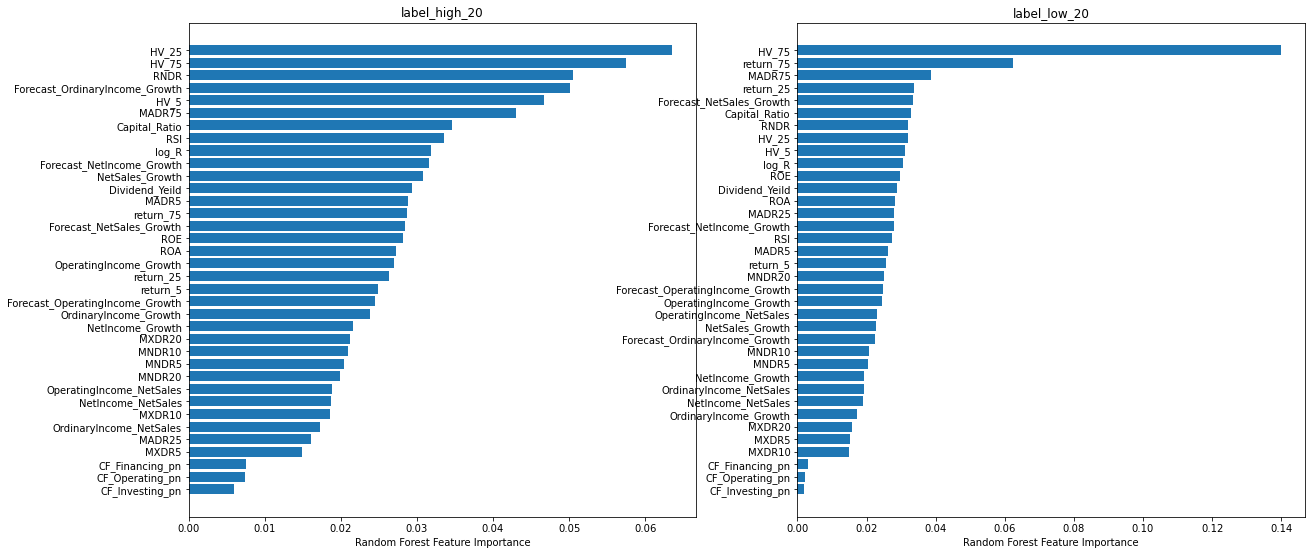

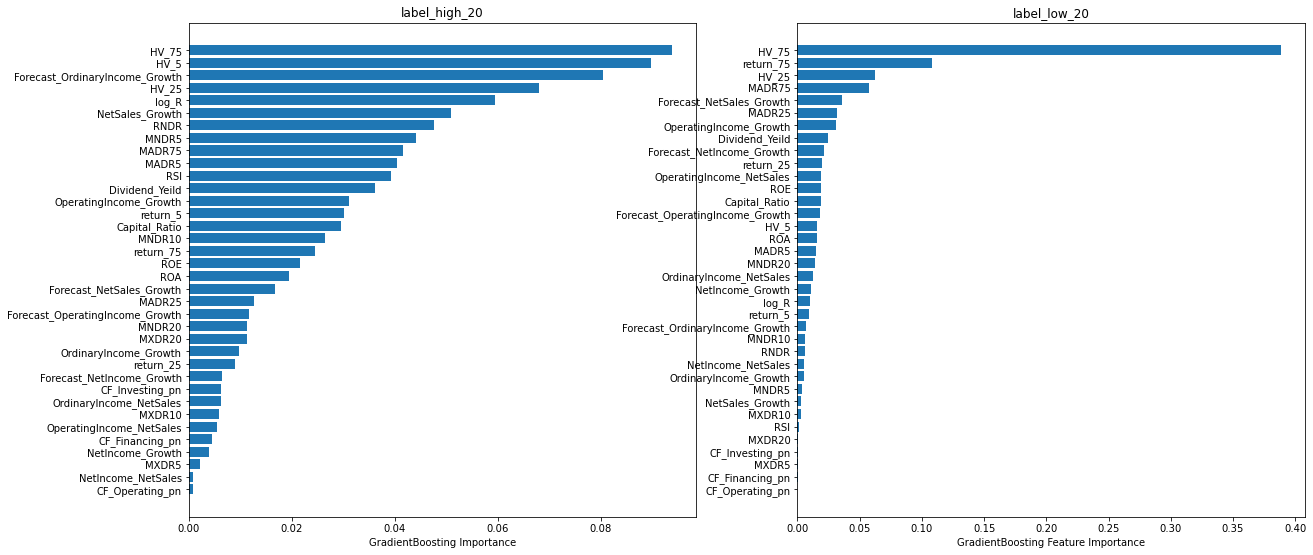

In [47]:
# 学習済みモデルを指定
save_path = os.path.join(save_dir, 'RandomForest_label_high_20.pickle')
with open(save_path, mode='rb') as fp:
    rf = pickle.load(fp)

# 重要度順を取得
sorted_idx = rf.feature_importances_.argsort()
# プロット
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2, 2, 1)
ax.barh(train_XY.columns.drop(Y_cols)[sorted_idx], rf.feature_importances_[sorted_idx])
ax.set_xlabel("Random Forest Feature Importance")
plt.title('label_high_20')

# 学習済みモデルを指定
save_path = os.path.join(save_dir, 'RandomForest_label_low_20.pickle')
with open(save_path, mode='rb') as fp:
    rf = pickle.load(fp)

# 重要度順を取得
sorted_idx = rf.feature_importances_.argsort()
ax = fig.add_subplot(2, 2, 2)
ax.barh(train_XY.columns.drop(Y_cols)[sorted_idx], rf.feature_importances_[sorted_idx])
ax.set_xlabel("Random Forest Feature Importance")
plt.title('label_low_20')

# 学習済みモデルを指定
save_path = os.path.join(save_dir, 'GradientBoosting_label_high_20.pickle')
with open(save_path, mode='rb') as fp:
    rf = pickle.load(fp)

# 重要度順を取得
sorted_idx = rf.feature_importances_.argsort()
# プロット
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2, 2, 3)
ax.barh(train_XY.columns.drop(Y_cols)[sorted_idx], rf.feature_importances_[sorted_idx])
ax.set_xlabel("GradientBoosting Importance")
plt.title('label_high_20')

# 学習済みモデルを指定
save_path = os.path.join(save_dir, 'GradientBoosting_label_low_20.pickle')
with open(save_path, mode='rb') as fp:
    rf = pickle.load(fp)

# 重要度順を取得
sorted_idx = rf.feature_importances_.argsort()
ax = fig.add_subplot(2, 2, 4)
ax.barh(train_XY.columns.drop(Y_cols)[sorted_idx], rf.feature_importances_[sorted_idx])
ax.set_xlabel("GradientBoosting Feature Importance")
plt.title('label_low_20')

<メモ>
* ボラティリティは重要度がかなり高い  
  ⇒期間が長いものを追加してもよいかも  
* キリ番(RNDR)が効いているのは新たな発見
* 売買高との関係を見てみる
* CF系はあまり効果がない ⇒ one-hotベクトルか
* 配当利回りは割と効いている
* ヒストリカルボラティリティの推移に関する変数を追加  
  ⇒単純に移動平均？平均ボラティリティというものがあるらしい。値幅(高値ー安値)の平均で算出することもあり。  
* ~~一日の変動(終値-始値)に関する指標を追加~~ ← 変化率で表現できてそう
* 曜日、業種に関するone-hotベクトル
* 来期予測系もかなり効いている